In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean

In [2]:
suicide_ts = pd.read_csv("data/suicide rate 1985-2016.csv")
suicide_ts.rename(columns={'suicides/100k pop': 'suicide_rate'}, inplace=True)
suicide_ts.head(n = 15)

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [1]:
country_year_pop = suicide_ts.groupby(["country","year"]).population.sum().reset_index()
country_year_suicide_no = suicide_ts.groupby(["country","year"]).suicides_no.sum().reset_index()
country_year = country_year_pop.merge(country_year_suicide_no)
def get_rate(row):
    return row["suicides_no"]/row["population"]
country_year["suicide_rate"] = country_year.apply (lambda row: get_rate(row), axis=1)
country_year["suicide_rate_per_100k"] = country_year.apply (lambda row: 10000*row["suicide_rate"], axis=1)
country_year_s = country_year.pivot(index='country', columns='year', values='suicide_rate_per_100k')
country_year_ss = country_year_s.loc[country_year_s.isnull().mean(axis=1).lt(0.3)]
# country_year_sss = country_year_ss.fillna(method="bfill")
# country_year_ssss = country_year_sss.fillna(method="ffill")
# country_year_ssss.to_csv("for_dtw.csv", encoding='utf-8', index=False)
sns.lineplot('year','suicide_rate_per_100k',hue='country',data=country_year)

NameError: name 'suicide_ts' is not defined

In [8]:
# l = [1  ,  5   , 3   , 4  ,  4  ,  1   , 1  ,  3   , 3  ,   5  ,  1     ,5   ,  1 ,    5  ,   4
# ,
#  4    , 1    , 1    , 1   ,  1  ,   2 ,    3  ,   5   ,  5   ,  5   ,  4   ,  4   ,  3  ,   3,

#  1    , 3  ,   1     ,3   ,  3     ,3  ,   1  ,   5   ,  5   ,  2   ,  3  ,   2  ,   5   ,  3,

#  5    , 2  ,   3  ,   5    , 3     ,5    , 4 ,    5  ,   3   ,  3]
# cluster1, cluster2 = [[],[],[],[],[]], [[],[],[],[],[]]
# for i, c in enumerate(l):
#     cluster1[c-1].append(country_year_ssss.index.values[i])

# s = "1  2  2  3  3  1  1  2  2  2  1  2  2  1  3  3  2  1  1  1  4  2  2  2  2  3  3  2  2  1 2  1  2  2  2  1  2  2  5  2  4  2  2  2  5  2  2  2  2  3  2  2  2 "
# s = list(map(int, s.split()))
# for i, c in enumerate(s):
#     cluster2[c-1].append(country_year_ssss.index.values[i])
# print(cluster2)
# cluster1


In [6]:
country_f = set(country_year_ss.index.values)
country_original = set(country_year_s.index.values)
country_removed = country_original - country_f
suicide_rate_finalized = country_year_ss.drop(index = 'Luxembourg')
suicide_rate_finalized = suicide_rate_finalized .drop(index = 'Guyana')
suicide_rate_finalized = suicide_rate_finalized .drop(index = 'Antigua and Barbuda')
# country_finalized.to_csv("finalized.csv", encoding='utf-8', index=True)
len(suicide_rate_finalized.index.values)

60

In [ ]:
suicide_rate_finalized = suicide_rate_finalized.T

In [33]:
suicide_rate_finalized= suicide_rate_finalized.fillna(method="bfill")

country,Argentina,Belize,Colombia,Ecuador,El Salvador,Grenada,Guatemala,Kyrgyzstan,Mexico,Panama,Paraguay,Suriname,Turkmenistan
year,,,,,,,,,,,,,
1985,0.733828,0.204360,0.399563,0.512934,1.265920,0.117130,0.293175,1.463623,0.228517,0.294783,0.204724,2.479083,0.951348
1986,0.838337,0.204360,0.374429,0.478347,1.265920,0.458190,0.293175,1.463623,0.247962,0.422702,0.176794,1.287183,0.951348
1987,0.828279,0.277645,0.339528,0.466686,1.265920,0.458190,0.339019,1.463623,0.250338,0.429120,0.190069,1.566204,0.951348
1988,0.831567,0.065322,0.318330,0.542289,1.265920,0.458190,0.238354,1.463623,0.244522,0.421448,0.193688,1.442827,0.922667
1989,0.782872,0.065322,0.283716,0.502412,1.265920,0.488968,0.202853,1.463623,0.261355,0.331364,0.193688,1.524202,0.843615
1990,0.735620,0.189873,0.288998,0.509037,1.265920,0.243902,0.205622,1.463623,0.263558,0.456962,0.278072,0.745627,0.967595
1991,0.658610,0.123305,0.330236,0.543353,1.035616,0.000000,0.197953,1.430265,0.281164,0.456962,0.204761,1.569906,0.863241
1992,0.726900,0.058548,0.366701,0.545760,0.912536,0.000000,0.214383,1.278879,0.297134,0.456962,0.271868,1.296617,0.833103
1993,0.731687,0.058548,0.358770,0.604944,0.903223,0.351683,0.199880,1.465688,0.304842,0.456962,0.271868,1.412379,0.720483


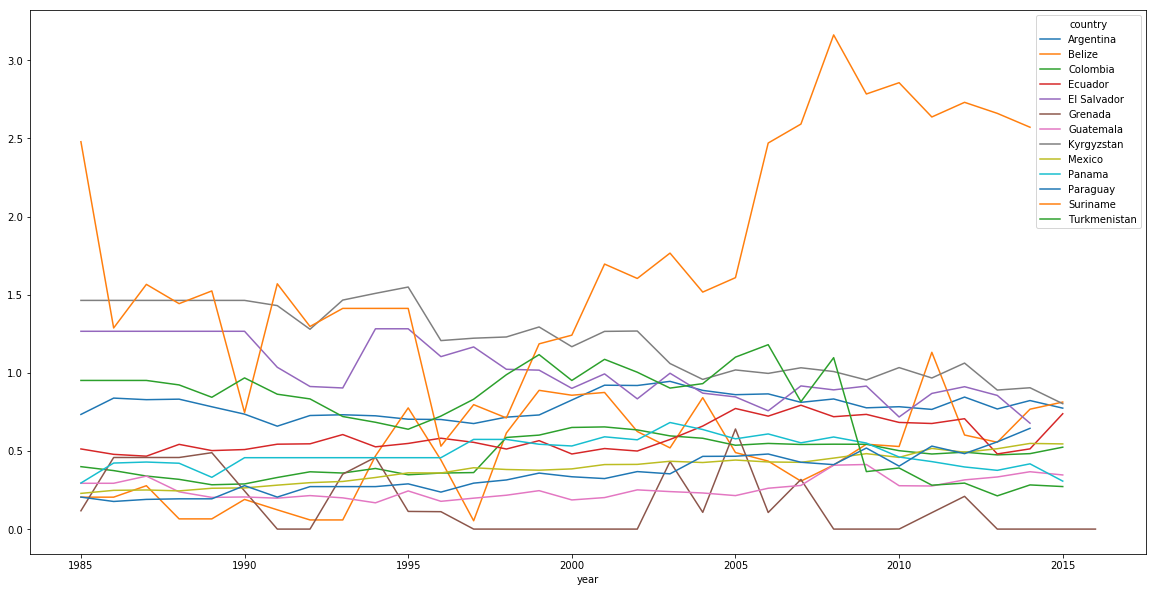

In [34]:
suicide_rate_finalized_c0 = suicide_rate_finalized[['Argentina','Belize','Colombia','Ecuador',
'El Salvador','Grenada','Guatemala','Kyrgyzstan', 'Mexico', 'Panama' ,
'Paraguay', 'Suriname', 'Turkmenistan']]

plt.rcParams["figure.figsize"] = (20,10)
suicide_rate_finalized_c0.plot(kind = 'line' )
suicide_rate_finalized_c0

country,Belgium,Czech Republic,Finland,France,Iceland,Ireland,Israel,Kazakhstan,Netherlands,New Zealand,Norway,Sweden,United Kingdom
year,,,,,,,,,,,,,
1985,2.460732,2.056452,2.953989,2.432925,1.453885,0.860295,0.623418,2.147030,1.202793,1.117060,1.480175,1.948413,0.963089
1986,2.371031,2.056452,2.953989,2.426333,1.664417,0.876675,0.728989,2.147030,1.171188,1.368098,1.480175,1.948413,0.910964
1987,2.408705,2.056452,2.953989,2.343124,1.595745,0.758584,0.698796,2.147030,1.172969,1.519478,1.651610,1.948413,0.862890
1988,2.141792,2.056452,3.025725,2.223837,1.527051,0.822638,0.767613,2.147030,1.099187,1.584184,1.793949,2.004817,0.932457
1989,2.053652,2.056452,3.035902,2.234924,0.948276,0.862497,0.877869,2.147030,1.091225,1.517723,1.668436,1.982473,0.816283
1990,2.022477,2.056452,3.234155,2.153423,1.714531,1.035980,0.731455,2.147030,1.034657,1.472778,1.663595,1.837441,0.866913
1991,1.920908,1.969485,3.177610,2.158666,1.568461,1.060853,0.811630,2.061152,1.141355,1.479447,1.699139,1.844275,0.843546
1992,1.991918,2.056415,3.073566,2.171485,1.176471,1.102516,0.830264,2.215167,1.116277,1.523674,1.543937,1.678393,0.855827
1993,2.263577,1.975596,2.946636,2.271000,1.081081,0.985937,0.786517,2.621417,1.086379,1.353416,1.471138,1.692450,0.821974


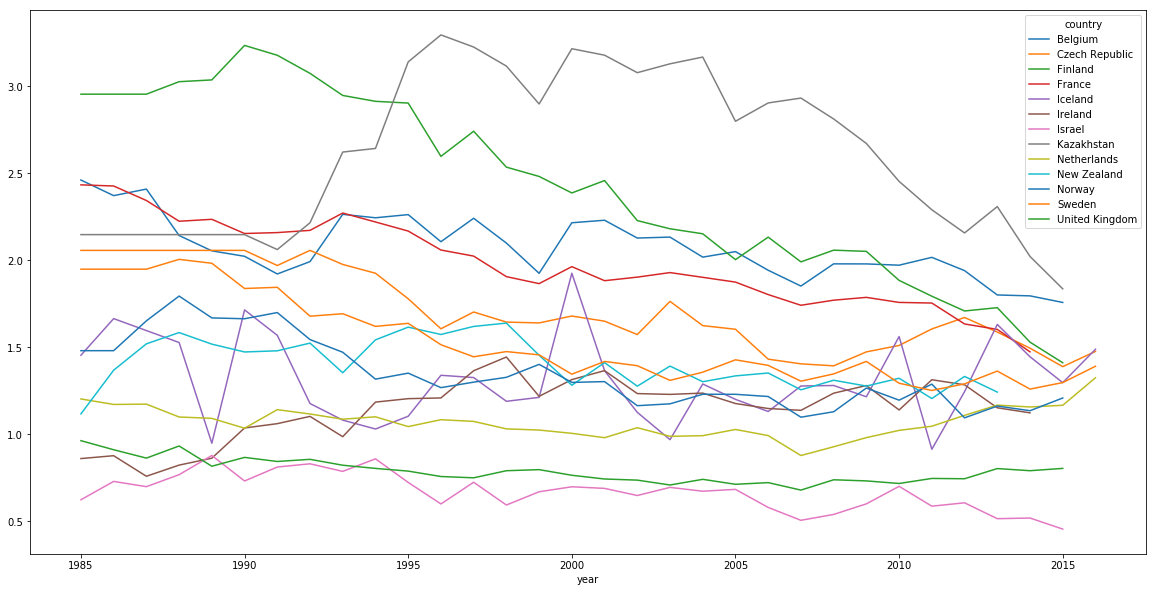

In [38]:
suicide_rate_finalized_c1 = suicide_rate_finalized[['Belgium',
  'Czech Republic',
  'Finland',
  'France',
  'Iceland',
  'Ireland',
  'Israel',
  'Kazakhstan',
  'Netherlands',
  'New Zealand',
  'Norway',
  'Sweden',
  'United Kingdom']]

plt.rcParams["figure.figsize"] = (20,10)
suicide_rate_finalized_c1.plot(kind = 'line' )
suicide_rate_finalized_c1

country,Australia,Brazil,Canada,Russian Federation,United States
year,,,,,
1985,1.277940,0.359894,1.386389,2.799759,1.334070
1986,1.380167,0.359583,1.561762,2.799759,1.385584
1987,1.438208,0.380386,1.508944,2.799759,1.367234
1988,1.418486,0.355287,1.457605,2.799759,1.336600
1989,1.326860,0.347125,1.432593,2.799759,1.316763
1990,1.393054,0.365560,1.367368,2.861328,1.343540
1991,1.428919,0.383968,1.415102,2.861316,1.321714
1992,1.389206,0.380054,1.401657,3.324889,1.293525
1993,1.244960,0.394512,1.411409,4.055840,1.305544


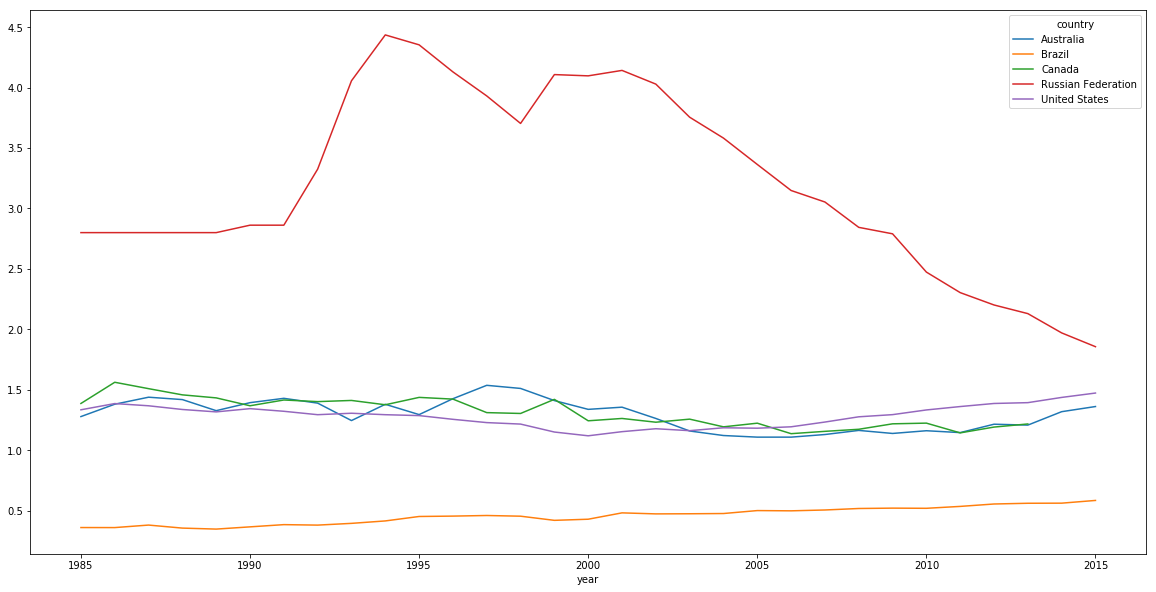

In [36]:
suicide_rate_finalized_c2 = suicide_rate_finalized[['Australia', 'Brazil', 'Canada', 'Russian Federation', 'United States']]

plt.rcParams["figure.figsize"] = (20,10)
suicide_rate_finalized_c2.plot(kind = 'line' )
suicide_rate_finalized_c2

country,Kuwait,Singapore
year,,
1985,0.115804,1.378430
1986,0.104214,1.370151
1987,0.099608,1.250104
1988,0.141332,1.529205
1989,0.141332,1.620666
1990,0.141332,1.409348
1991,0.141332,1.156566
1992,0.141332,1.063748
1993,0.141332,1.016643


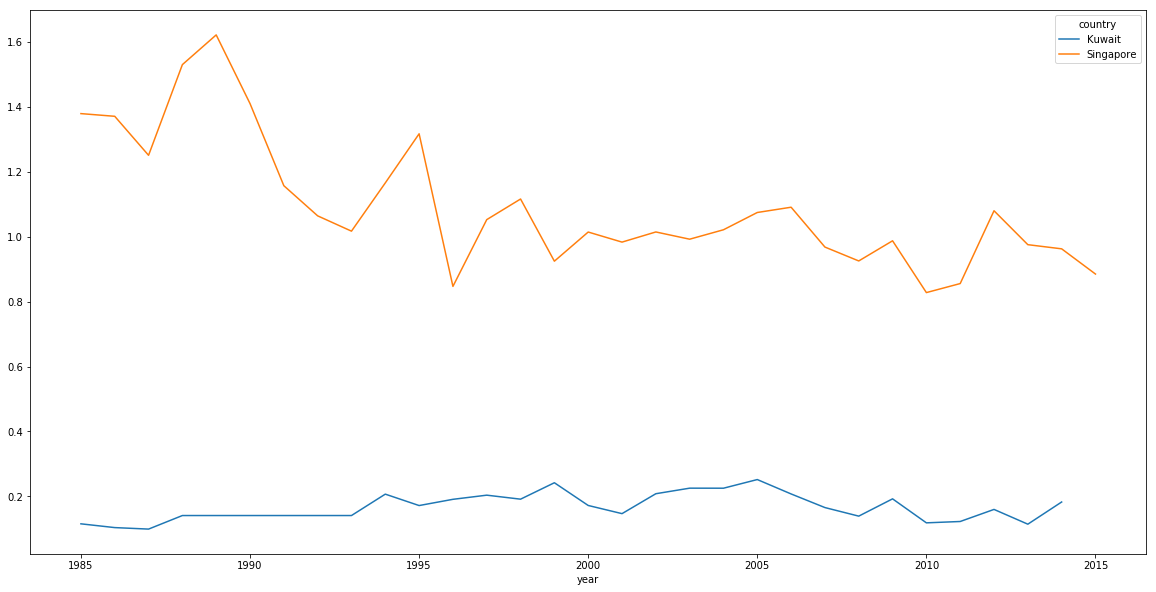

In [37]:
suicide_rate_finalized_c3 = suicide_rate_finalized[['Kuwait', 'Singapore']]

plt.rcParams["figure.figsize"] = (20,10)
suicide_rate_finalized_c3.plot(kind = 'line' )
suicide_rate_finalized_c3

country,Armenia,Austria,Bahamas,Barbados,Bulgaria,Chile,Costa Rica,Cuba,Germany,Greece,...,Mauritius,Poland,Portugal,Puerto Rico,Romania,Spain,Thailand,Trinidad and Tobago,Ukraine,Uruguay
year,,,,,,,,,,,,,,,,,,,,,
1985,NaN,2.940881,0.049092,0.303030,1.734882,0.639789,0.572400,NaN,NaN,0.436639,...,1.177270,NaN,1.055408,0.872668,NaN,0.698392,0.644013,0.287698,NaN,1.048440
1986,NaN,3.004573,NaN,0.345423,1.677888,0.598260,0.571329,NaN,NaN,0.421041,...,0.311769,NaN,1.006498,0.986256,NaN,0.760566,0.591150,0.979653,NaN,0.950102
1987,NaN,2.901821,0.135808,0.256739,1.781407,0.618253,0.495689,NaN,NaN,0.436756,...,1.536267,NaN,1.023564,0.852825,NaN,0.769786,0.627372,1.103589,2.121408,0.928425
1988,NaN,2.590837,NaN,0.511073,1.730673,0.616487,0.559792,NaN,NaN,0.426455,...,1.805405,NaN,0.871232,0.970454,NaN,0.808803,NaN,1.496897,2.050688,0.957280
1989,NaN,2.644314,NaN,0.677966,1.737433,0.630380,0.653365,NaN,NaN,0.401994,...,1.543574,NaN,0.793392,0.995798,1.184849,0.813001,NaN,1.616822,2.279441,1.219555
1990,0.311694,2.523732,NaN,0.675105,1.571539,0.634555,0.597458,NaN,1.857554,0.362899,...,1.562002,1.413345,0.923487,1.157928,0.971409,0.797311,0.732598,1.561782,2.219021,1.111503
1991,0.247617,2.423378,NaN,0.717300,1.641386,0.662960,0.462278,NaN,1.855730,0.391929,...,1.460399,1.501852,1.001009,1.096627,1.007084,0.789002,0.685112,1.343013,2.219889,NaN
1992,0.250854,2.384966,NaN,0.583333,1.888951,0.542680,0.536280,2.318569,1.767726,0.356919,...,1.539597,1.604532,0.921124,0.955017,1.248404,0.752955,0.675284,1.439167,2.405991,NaN
1993,0.314858,2.292304,0.287474,0.667780,1.837270,0.601313,0.574693,2.373003,1.652486,0.414887,...,1.440050,1.571275,0.828898,1.041518,1.301883,0.818111,NaN,1.515283,2.561395,1.443257


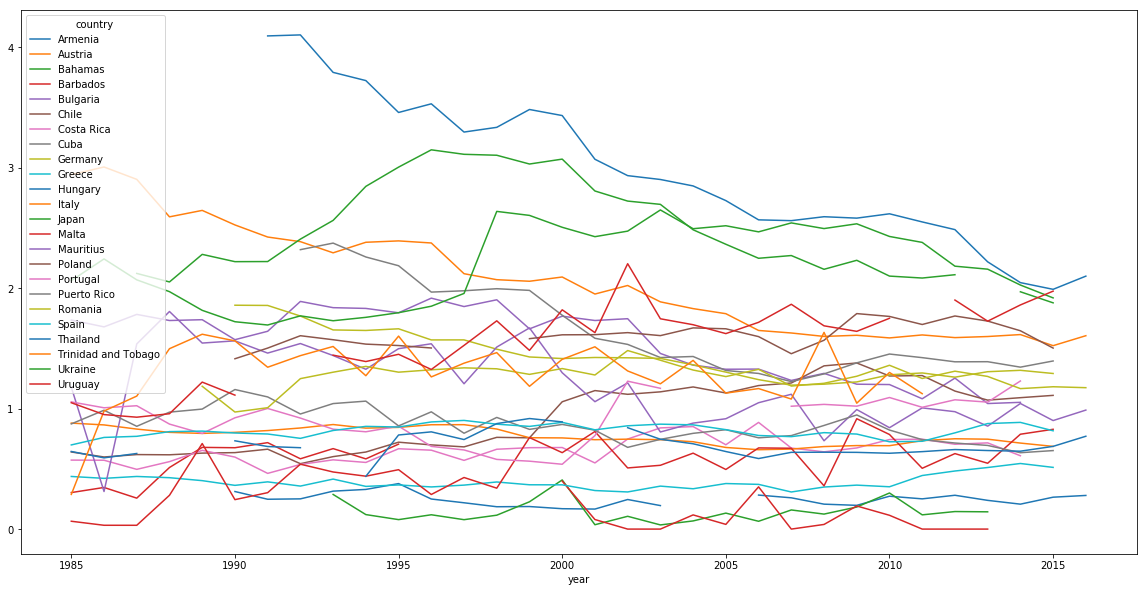

In [32]:
suicide_rate_finalized_c4 = suicide_rate_finalized[['Armenia',
  'Austria',
  'Bahamas',
  'Barbados',
  'Bulgaria',
  'Chile',
  'Costa Rica',
  'Cuba',
  'Germany',
  'Greece',
  'Hungary',
  'Italy',
  'Japan',
  'Malta',
  'Mauritius',
  'Poland',
  'Portugal',
  'Puerto Rico',
  'Romania',
  'Spain',
  'Thailand',
  'Trinidad and Tobago',
  'Ukraine',
  'Uruguay']]

plt.rcParams["figure.figsize"] = (20,10)
suicide_rate_finalized_c4.plot(kind = 'line' )
suicide_rate_finalized_c4

In [41]:
gdp = pd.read_csv("data/Selected Datav1.csv")
gdp.rename(columns = {"Unnamed: 0":"country", "Unnamed: 2":"feature"}, inplace = True)
gdp
gdp = gdp[gdp['country'].isin(suicide_rate_finalized.index)]


In [42]:
gdp = gdp[gdp['feature'] == 'GDP growth (annual %)']
gdp= gdp.fillna(method="bfill")
gdp

,country,Unnamed: 1,feature,Unnamed: 3,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
812,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,...,-5.918525,10.125398,6.003952,-1.026420,2.405324,-2.512615,2.731160,-2.080328,2.668590,-2.514590
827,Armenia,ARM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.486103,1.295678,6.215017,6.978496,5.983280,...,-14.149989,2.200000,4.700000,7.200000,3.300000,3.600000,3.200000,0.200000,7.500000,5.200000
857,Australia,AUS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.486103,1.295678,6.215017,6.978496,5.983280,...,1.936905,2.067520,2.462725,3.900900,2.615722,2.568707,2.336075,2.846755,2.342582,2.834948
872,Austria,AUT,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.537979,2.648675,4.138268,6.124354,3.480175,...,-3.764580,1.837095,2.922798,0.680444,0.025504,0.661275,1.142980,2.039575,2.550881,2.729083
902,"Bahamas, The",BHS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,10.667097,10.451972,10.524055,10.501567,10.425596,...,-4.175260,1.538777,0.612897,3.086687,-0.410429,-0.147989,1.044960,-1.689550,1.437191,1.437835
947,Barbados,BRB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,4.978423,5.212004,4.351584,6.956685,3.560660,...,-3.972928,0.265446,0.657294,0.281154,0.009044,0.018086,0.904159,2.007168,1.000000,1.437835
977,Belgium,BEL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,4.978423,5.212004,4.351584,6.956685,3.560660,...,-2.253172,2.744231,1.798306,0.234779,0.200662,1.254677,1.739580,1.452552,1.734390,1.437835
992,Belize,BLZ,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,4.892277,4.892652,4.956434,4.999880,4.930541,...,0.670801,3.383472,2.162607,2.937813,0.851935,3.692371,3.431950,-0.588024,1.437289,3.049644
1097,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,10.275912,5.216059,0.874673,3.485582,3.053488,...,-0.125812,7.528226,3.974423,1.921176,3.004823,0.503956,-3.545763,-3.305454,1.063861,1.117579
1142,Bulgaria,BGR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.245272,7.425385,5.349546,6.642894,6.316714,...,-3.586146,1.324088,1.914906,0.030970,0.493921,1.837521,3.471186,3.936758,3.811248,3.081157


In [31]:
suicide_rate_finalized= suicide_rate_finalized.fillna(method="bfill")
suicide_rate_finalized.rename(index={'Bahamas':'Bahamas, The','Republic of Korea': 'Korea, Rep.','Saint Lucia': 'St. Lucia','Saint Vincent and Grenadines': 'St. Vincent and the Grenadines','Kyrgyzstan':'Kyrgyz Republic' }, inplace=True)


In [76]:
from pandas.plotting import autocorrelation_plot
df_x = suicide_rate_finalized
df_y = suicide_rate_finalized
df_x = df_x.iloc[:, : 25]
df_x
df_y = df_y.iloc[:, 25:]
df_y

year,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,
Argentina,0.783162,0.765999,0.844914,0.768674,0.822628,0.774063,0.279163
Armenia,0.272772,0.250902,0.280709,0.238378,0.206919,0.264727,0.279163
Australia,1.160808,1.145489,1.214752,1.207397,1.318431,1.361013,1.604622
Austria,1.586262,1.610977,1.588789,1.597848,1.614020,1.522011,1.604622
"Bahamas, The",0.299519,0.118209,0.145536,0.143283,1.795091,1.757283,1.475933
Barbados,0.114536,0.000000,0.000000,0.000000,1.795091,1.757283,1.475933
Belgium,1.971370,2.016393,1.940123,1.800279,1.795091,1.757283,1.475933
Belize,0.528549,1.131447,0.602115,0.555759,0.767312,0.812919,1.475933
Brazil,0.519133,0.534803,0.554714,0.560816,0.561638,0.584184,1.475933


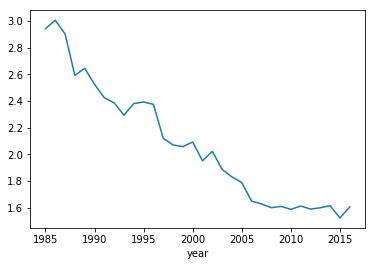

In [54]:
suicide_rate_finalized.iloc[3].plot(kind = 'line')

In [85]:
#The null hypothesis of the ADF test is that the time series is non-stationary. 
#So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis 
#and infer that the time series is indeed stationary.
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_x.iloc[3])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.856841
p-value: 0.992500


In [88]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_x.iloc[3], model= 'multiplicative' )
fig = result.plot()
plot_mpl(fig)

ModuleNotFoundError: No module named 'plotly'

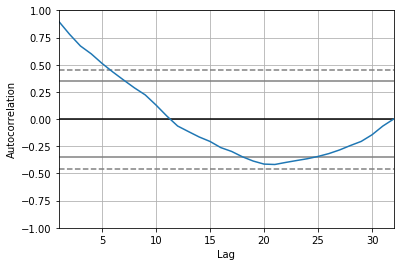

In [55]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(suicide_rate_finalized.iloc[3])

In [82]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_x.iloc[3], order=(4,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/CaptainQueer/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/CaptainQueer/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.Austria   No. Observations:                   24
Model:                 ARIMA(4, 1, 0)   Log Likelihood                  24.226
Method:                       css-mle   S.D. of innovations              0.087
Date:                Tue, 26 Nov 2019   AIC                            -36.453
Time:                        06:01:55   BIC                            -29.385
Sample:                             1   HQIC                           -34.578
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0576      0.009     -6.514      0.000      -0.075      -0.040
ar.L1.D.Austria    -0.3682      0.203     -1.811      0.086      -0.767       0.030
ar.L2.D.Austria    -0.2944      

               0
count  24.000000
mean    0.000175
std     0.091949
min    -0.240894
25%    -0.042230
50%     0.008084
75%     0.066527
max     0.136298


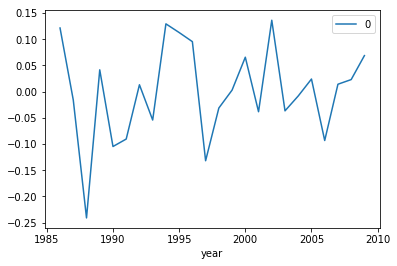

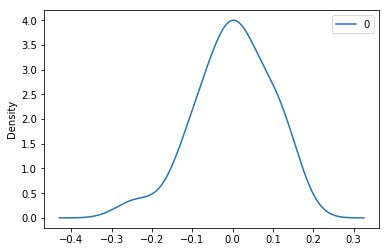

In [79]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())